# Todo:
- convert to numpy array

In [5]:
import math

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

# Solow Groth Model with Technological Progress.

The production function is defined by a Cobb-Douglas function:
$$ Y_t = A_t K_t^\alpha L_t^{1-\alpha} $$
                             
Labour grows as

$$ L_{t+1} = (1 + n) L_t $$

Technology grows as 

$$ A_{t+1} = (1+g) A_t $$

Capital accumluation is given as

$$ K_{t+1} =s Y_t + (1- \delta) K_t $$

Wages are given by

$$ W_t = \frac{\partial Y_t}{\partial L_t} $$


In [21]:
# Solow growth with technological progress.

class Solow:
    def __init__(
        self,
        alpha: float = 0.3,
        n: float = 0.02,
        g: float = 0.02,
        s: float = 0.2,
        delta: float = 0.05,
        L0: float = 100.0,
        K0: float = 500.0,
        A0: float = 1.0
    ):
        self.alpha = alpha
        self.n = n
        self.g = g
        self.s = s
        self.delta = delta

        self.L = [L0]
        self.K = [K0]
        self.A = [A0]
        self.Y = [self.production_function(A0, K0, L0)]
        self.w = [(1-alpha) * self.production_function(A0, K0, L0) / L0]


    def production_function(self, A, K, L):
        return A * K**self.alpha * L**(1-self.alpha)


    def capital_tp1(self, Y, K):
        return self.s * Y + (1 - self.delta) * K

    
    def simulate(self, t):
        for _ in range(t):
            A_tp1 = (1 + self.g) * self.A[-1]
            K_tp1 = self.capital_tp1(self.Y[-1], self.K[-1])
            L_tp1 = (1 + self.n) * self.L[-1]
            Y_tp1 = self.production_function(A_tp1, K_tp1, L_tp1)
            w_tp1 = (1 - self.alpha) * Y_tp1 / L_tp1

            self.L.append(L_tp1) 
            self.K.append(K_tp1) 
            self.A.append(A_tp1)
            self.Y.append(Y_tp1) 
            self.w.append(w_tp1)

        print(f"{t} time periods simulated. Total time periods simulated for this economy: {len(self.Y)}")

    def visualise(self, **figure_kwargs):
        plt.figure(**figure_kwargs)

        sns.scatterplot(x=self.Y, y=self.w)

        plt.title('Wages Against Output')
        plt.ylabel("Wage")
        plt.xlabel("Output")

        plt.show()


In [22]:
# Simulate two economies
solow_1 = Solow(g=0.06)
solow_2 = Solow(g=0.04)

T = 50

solow_1.simulate(T)
solow_2.simulate(T)

50 time periods simulated. Total time periods simulated for this economy: 51
50 time periods simulated. Total time periods simulated for this economy: 51


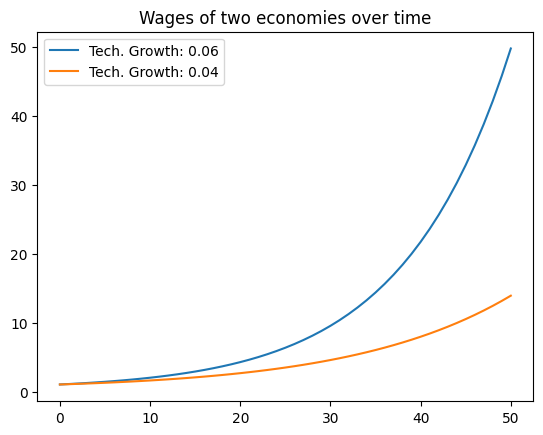

In [23]:
y_1 = solow_1.Y
y_2 = solow_2.Y
y_tot = y_1 + y_2

w_1 = solow_1.w
w_2 = solow_2.w

plt.plot(w_1, label='Tech. Growth: 0.06')
plt.plot(w_2, label='Tech. Growth: 0.04')

plt.title("Wages of two economies over time")
plt.legend()
plt.show()